In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

## Runge kunta

1 21


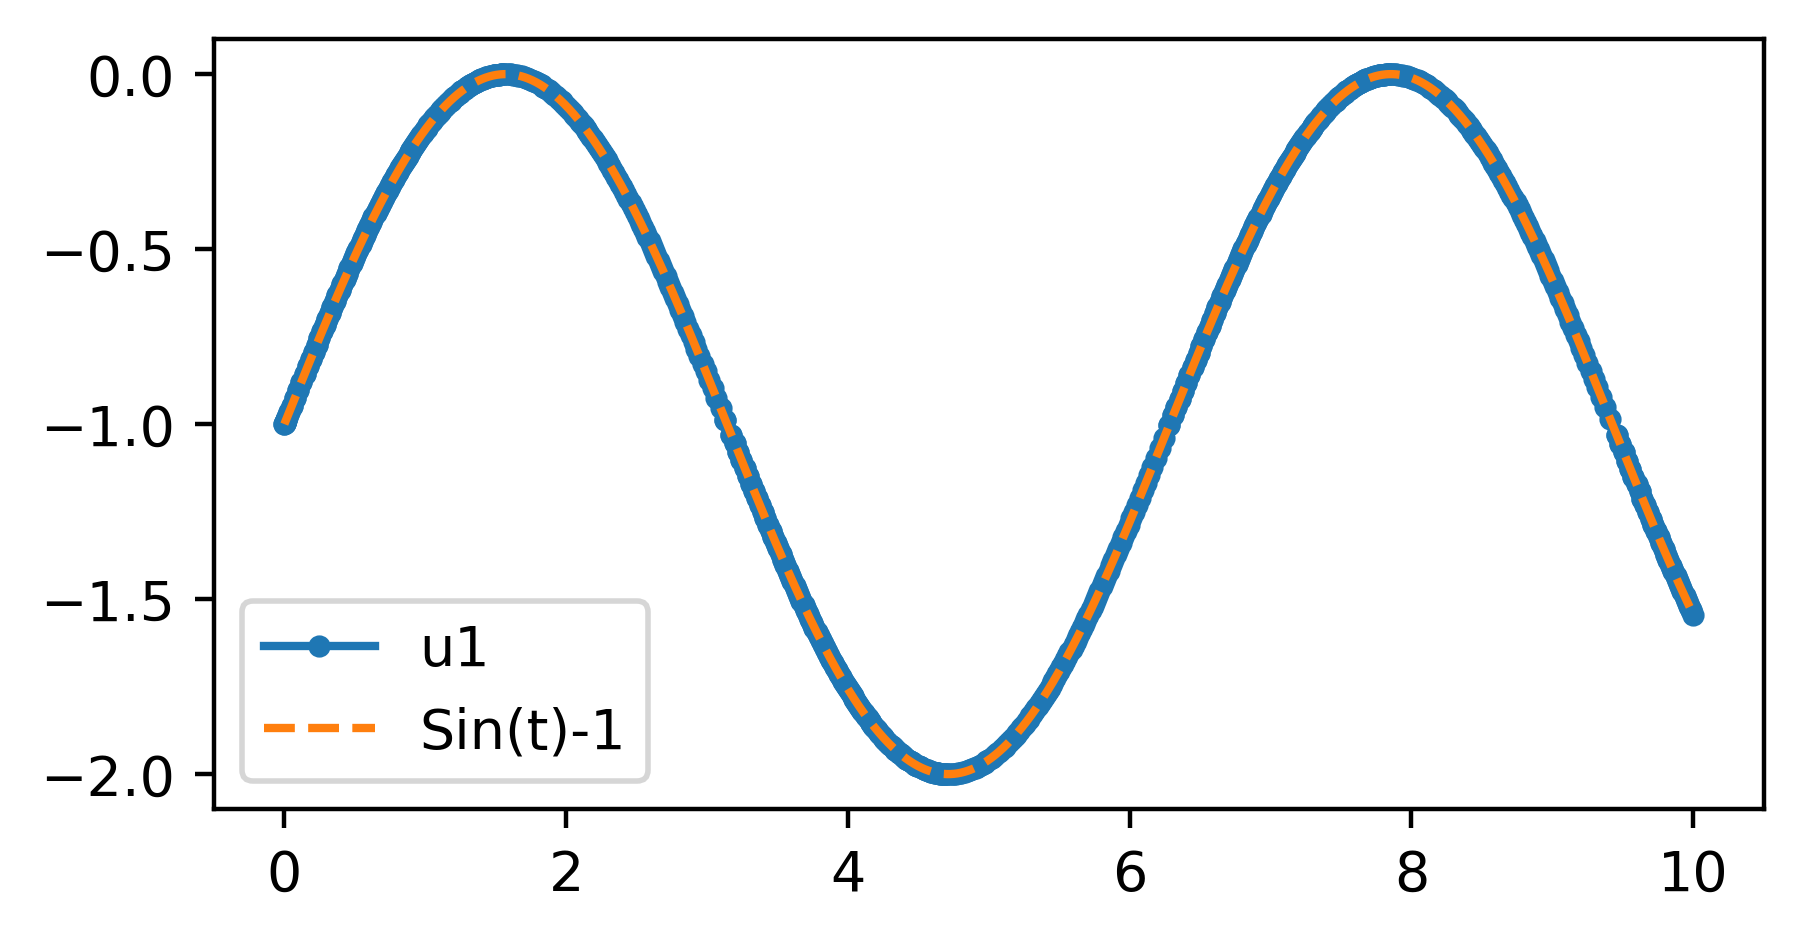

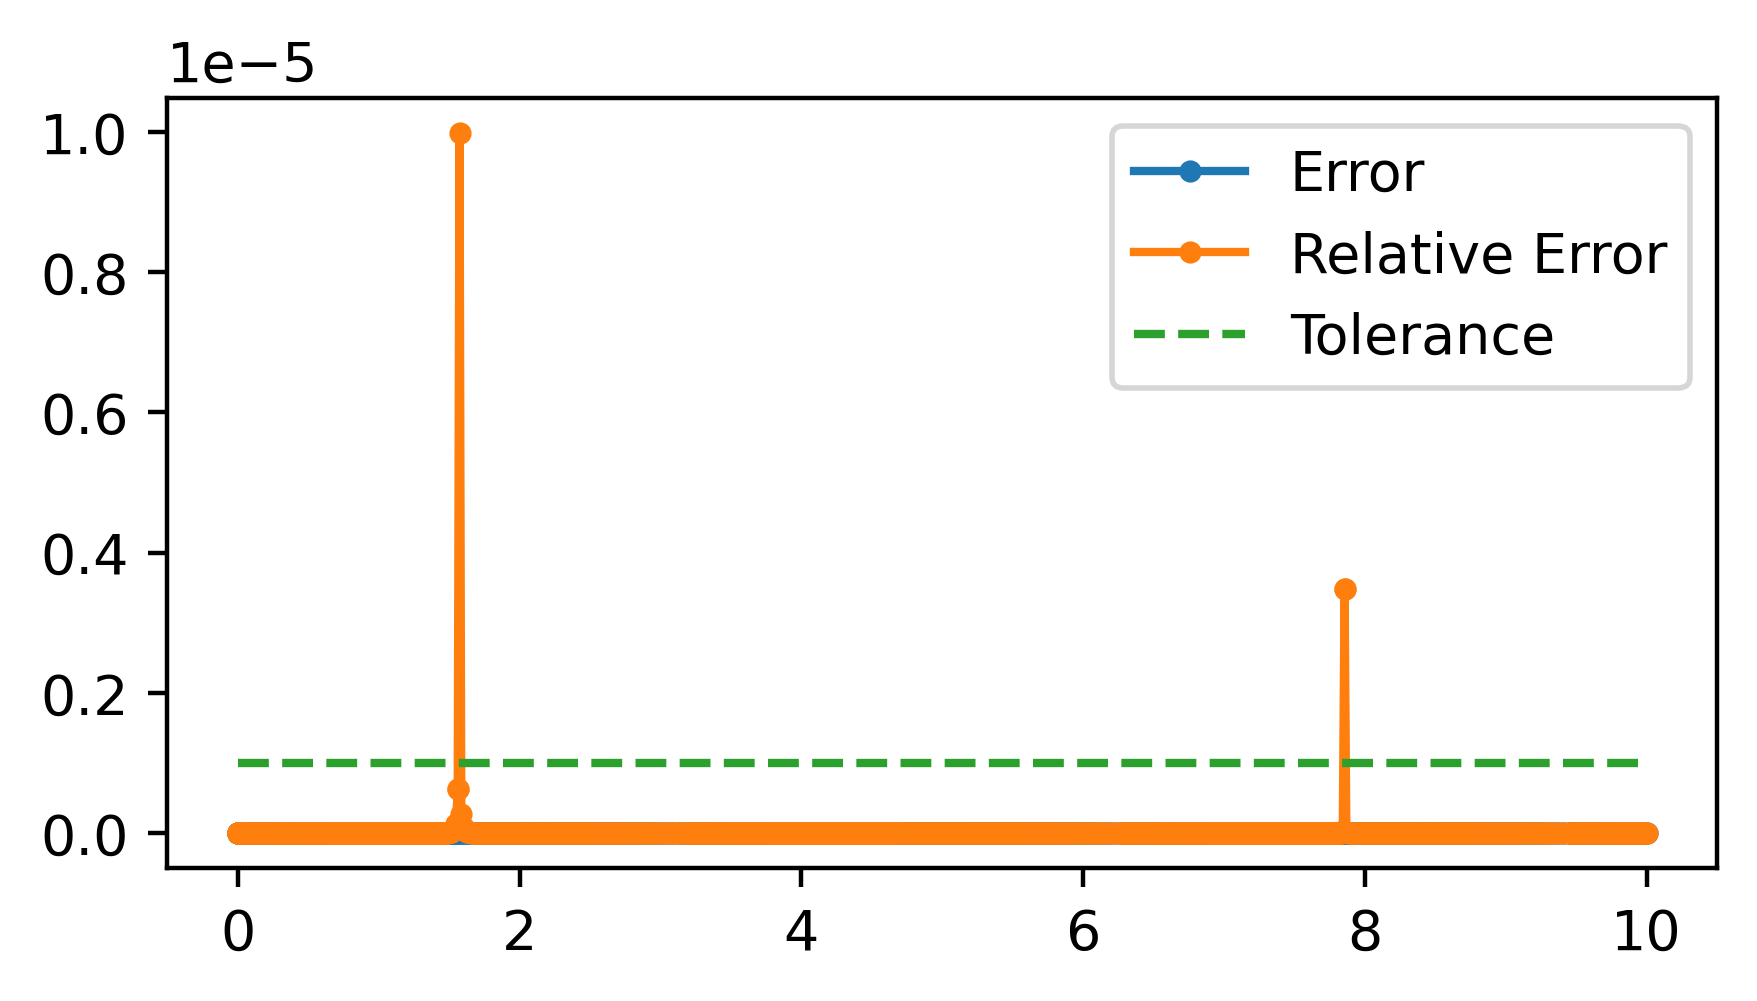

In [ ]:


def Runge_kuta_4(f,u,t,dt0):
    # f(u,t) is the function to be integrated
    Y1=u
    Y2=u+1/2*dt0*f(u,t)
    Y3=u+1/2*dt0*f(Y2,t+dt0)
    Y4=u+dt0*f(Y3,t+dt0/2)
    unew=u+dt0/6*(f(Y1,t)+2*f(Y2,t+dt0/2)+2*f(Y3,t+dt0/2)+f(Y4,t+dt0)) 

    return unew


def Runge_kuta_24(f,u,t,dt0,tol):
    # f(u,t) is the function to be integrated
    Y1=u
    Y2=u+1/2*dt0*f(u,t)
    s3=dt0*f(Y2,t+dt0)
    Y3=u+1/2*s3

    Y4=u+dt0*f(Y3,t+dt0/2)    
    Y5=u+dt0/6*(f(Y1,t)+2*f(Y2,t+dt0/2)+2*f(Y3,t+dt0/2)+f(Y4,t+dt0)) 
    error_estimat=dt0*abs(Y5-(u+s3))
    dt=(tol/error_estimat)**(1/2)

    if error_estimat>tol:
        unew=u
        tnew=t
    else:
        unew=Y5
        tnew=t+dt0      
    return unew,tnew,dt



def f(u,t):
    return np.cos(t)

def solve_sys(f,u0,t0,tf,n):
    # f(u,t) is the function to be integrated
    # u0 is the initial condition
    # t0 is the initial time
    # tf is the final time
    # n is the number of steps
    dt=(tf-t0)/n
    t=t0+dt*np.arange(0,n+1,1)
    u0 = np.atleast_1d(u0)  # Ensures u0 is at least 1D
    print(len(u0),len(t)),
    u=np.zeros([len(t),len(u0)])
    u[0]=u0[0]

    for i in range(1,len(t)):
        u[i]=Runge_kuta_4(f,u[i-1],t[i-1],dt)

    return t,u


def solve_sys_emped_error(f,u0,t0,tf,tol):
    # f(u,t) is the function to be integrated
    # u0 is the initial condition
    # t0 is the initial time
    # tf is the final time
    # n is the number of steps
    dt0=(tf-t0)/10
    t,u=[],[]
    u.append(u0)
    t.append(t0)
    dt=dt0
    tnew=t0
    i=0
    while tnew<tf:
        i+=1
        unew,tnew,dt=Runge_kuta_24(f,u[i-1],t[i-1],dt,tol)
        u.append(unew)
        t.append(tnew)

    t=np.array(t)
    u=np.array(u)    

    return t,u

atol=1e-6
tvec,uvec=solve_sys_emped_error(f,-1,0,10,atol)
errpr_abs=np.abs(np.sin(tvec)-1-uvec[:])
relv=np.abs(errpr_abs/(np.sin(tvec)-1))
tvec2,uvec2=solve_sys(f,-1,0,10,20)





plt.figure(figsize=(5,2.5),dpi=400)
plt.plot(tvec,uvec[:],'.-',label='u1')

#plt.plot(tvec2,uvec2[:],'.-',label='u2')
tvec3=np.linspace(0,10,10000)
plt.plot(tvec3,np.sin(tvec3)-1,'--',label='Sin(t)-1')
plt.legend()



plt.figure(figsize=(5,2.5),dpi=400)
plt.plot(tvec,errpr_abs[:],'.-',label='Error')
plt.plot(tvec,relv[:],'.-',label='Relative Error')
plt.plot([tvec[0],tvec[-1]],[atol,atol],'--',label='Tolerance')
plt.legend()

-0.4855772535472736
[2.e-01 2.e-02 2.e-03 2.e-04 2.e-05 2.e-06]


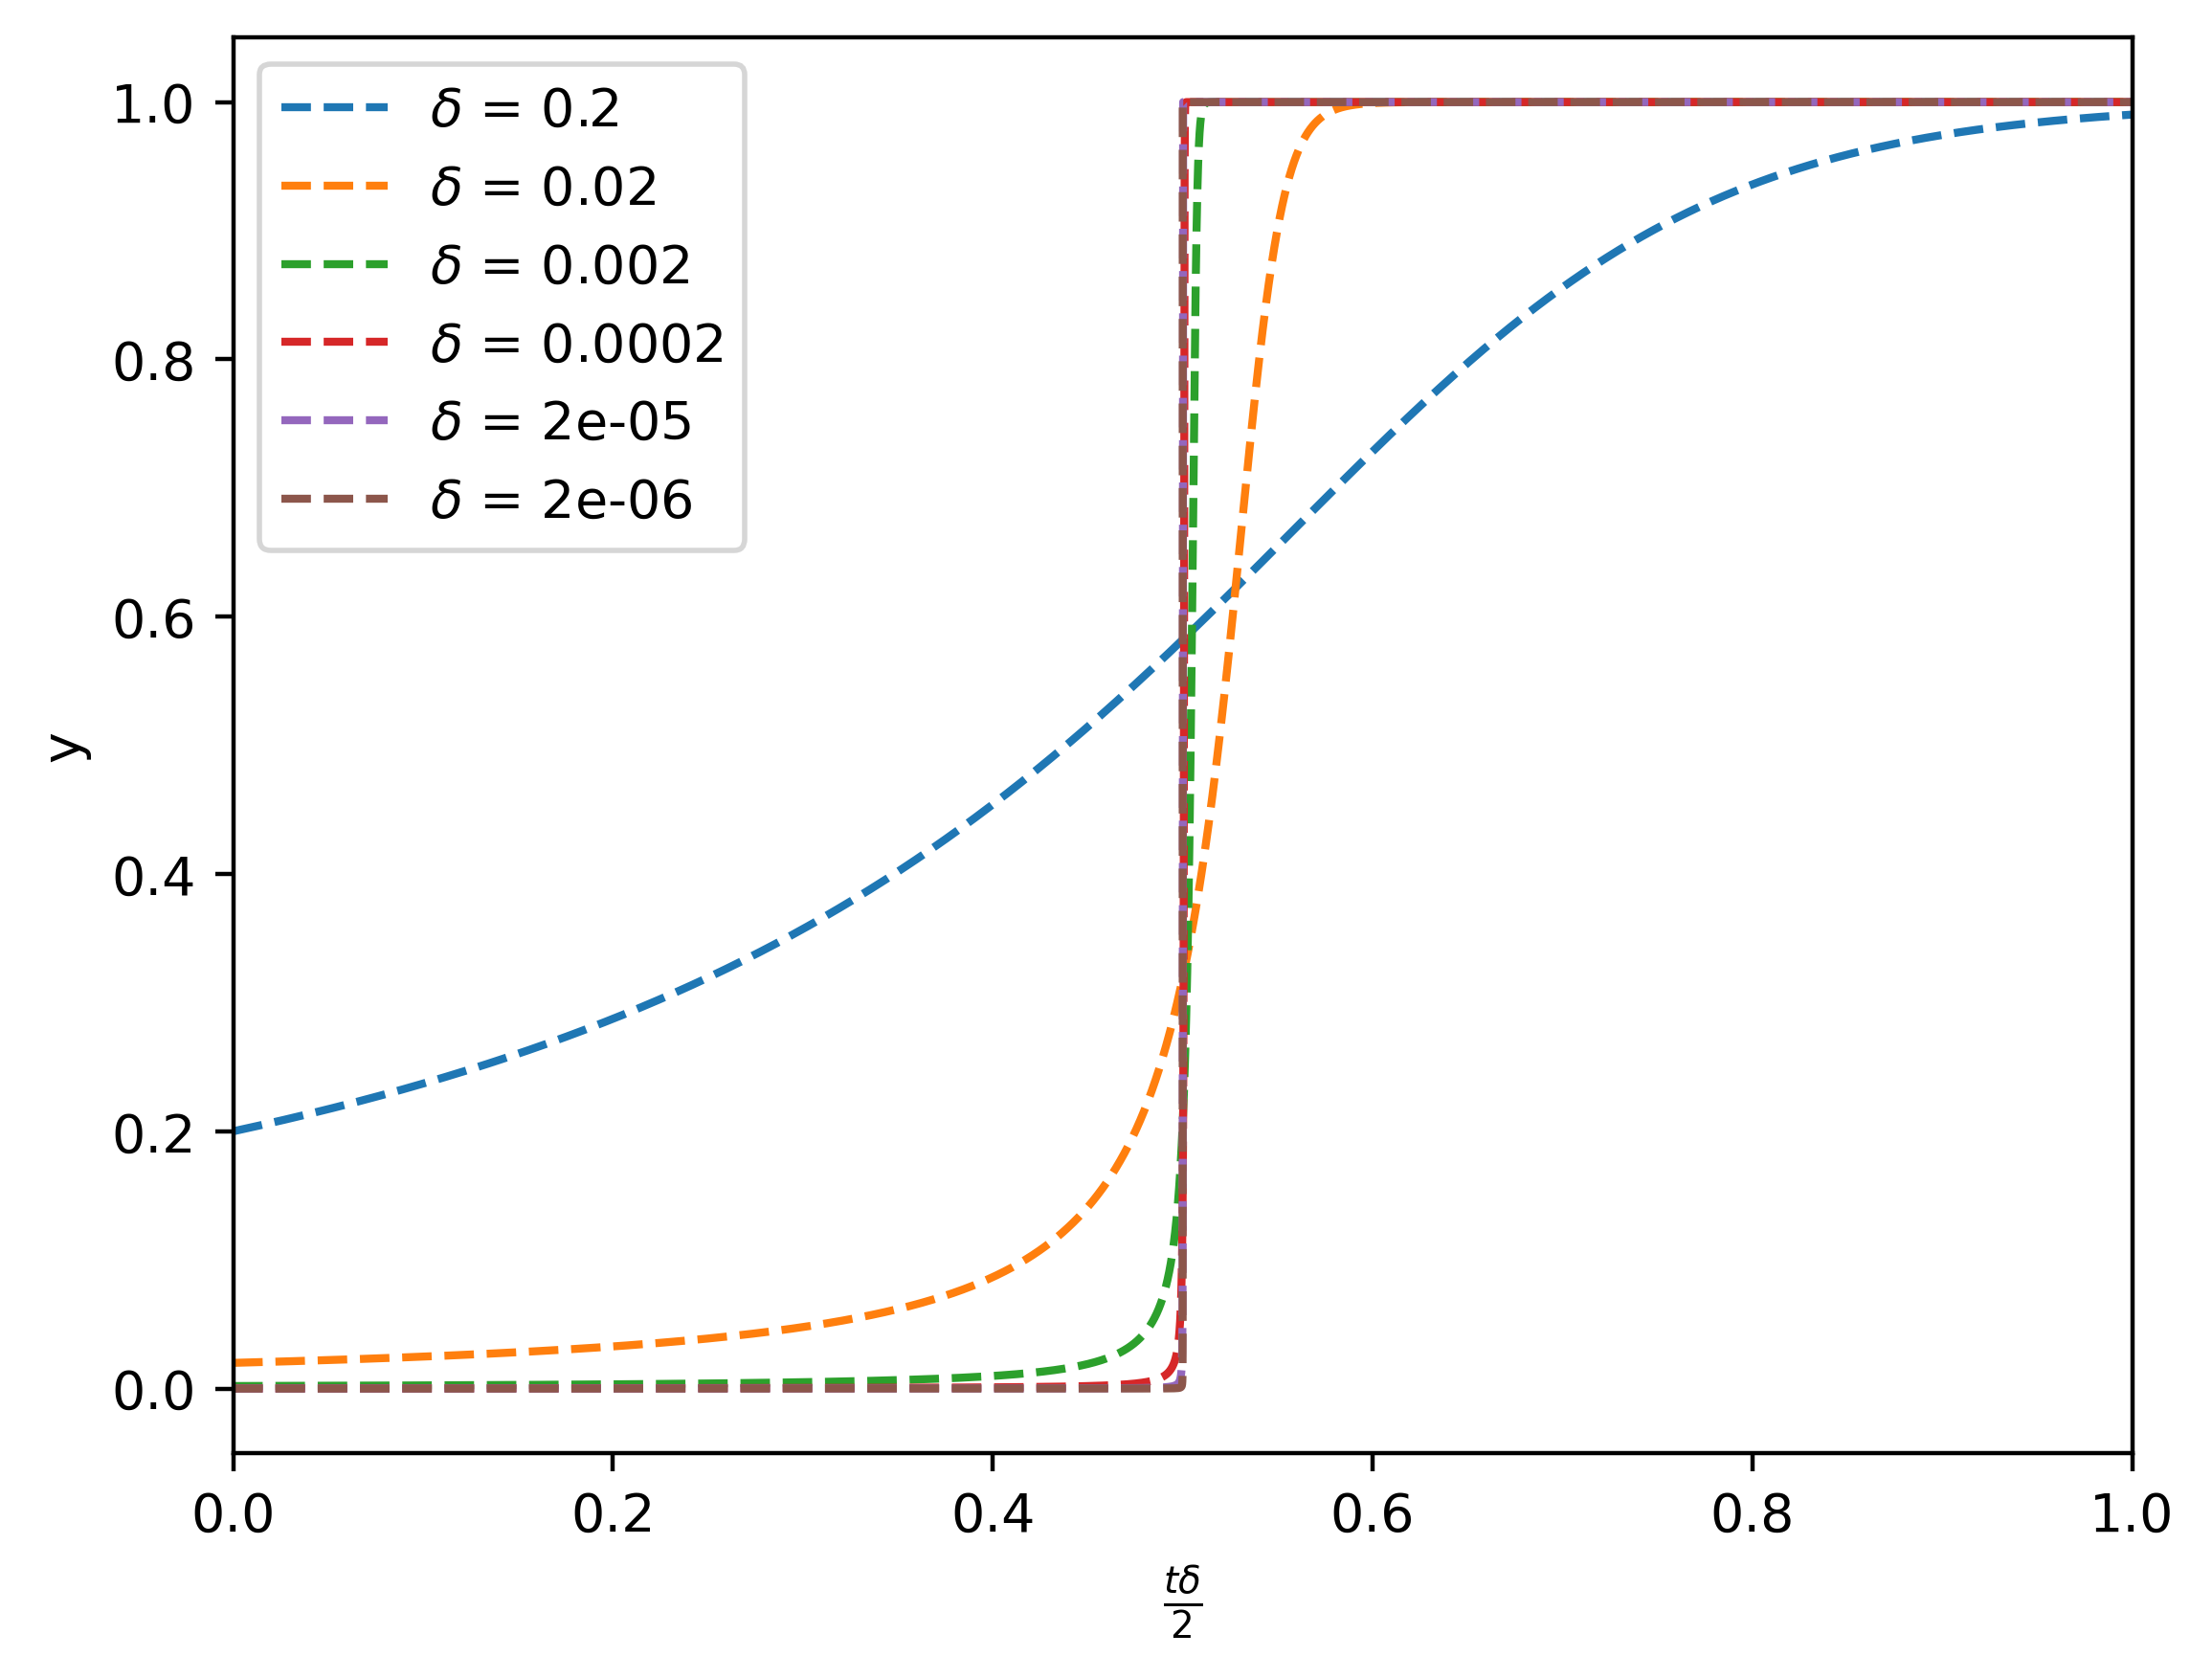

In [ ]:
delta=0.002 
tend=2/delta
def Analytic_flame_probagation(y,delta):
    t=np.log(y/(1-y)*(1-delta)/delta)+(y-delta)/(y*delta)
    return t



tendish=Analytic_flame_probagation(0.9999,delta)  
print((tendish-tend)/tend)


yvec1=np.linspace(delta,0.999,1000000)
yvec2=np.logspace(-0.0004345117740176917,-1e-8,1000)
yvec=np.concatenate((yvec1,yvec2))
tvec=Analytic_flame_probagation(yvec,delta)

#plt.figure(figsize=(10,5),dpi=400)
#plt.plot(tvec,yvec,'-',label='Analytic')
#print(np.log10(0.999))


deltavec=np.ones(6)*2*np.logspace(-1,-6,6)

print(deltavec)
plt.figure(num=1,dpi=400)
for dd in range(0,len(deltavec)):
    delta=deltavec[dd]
    tend=2/delta
    yvec1=np.linspace(delta,0.999,1000000)
    yvec2=np.logspace(-0.0004345117740176917,-1e-8,1000)
    yvec3=np.concatenate((yvec1,yvec2))
    tvec1=Analytic_flame_probagation(yvec3,delta)    
    tve2=np.array([tend])
    tvec=np.concatenate((tvec1,tve2))
    yvec4=np.array([1])
    yvec=np.concatenate((yvec3,yvec4))
    plt.plot(tvec/tend,yvec,'--',label='$\\delta$ = '+str(delta))
    plt.legend()
    plt.xlim(0,1)
    plt.xlabel('$\\frac{t \\delta}{2}$')
    plt.ylabel('y')

## Exicersce 1 

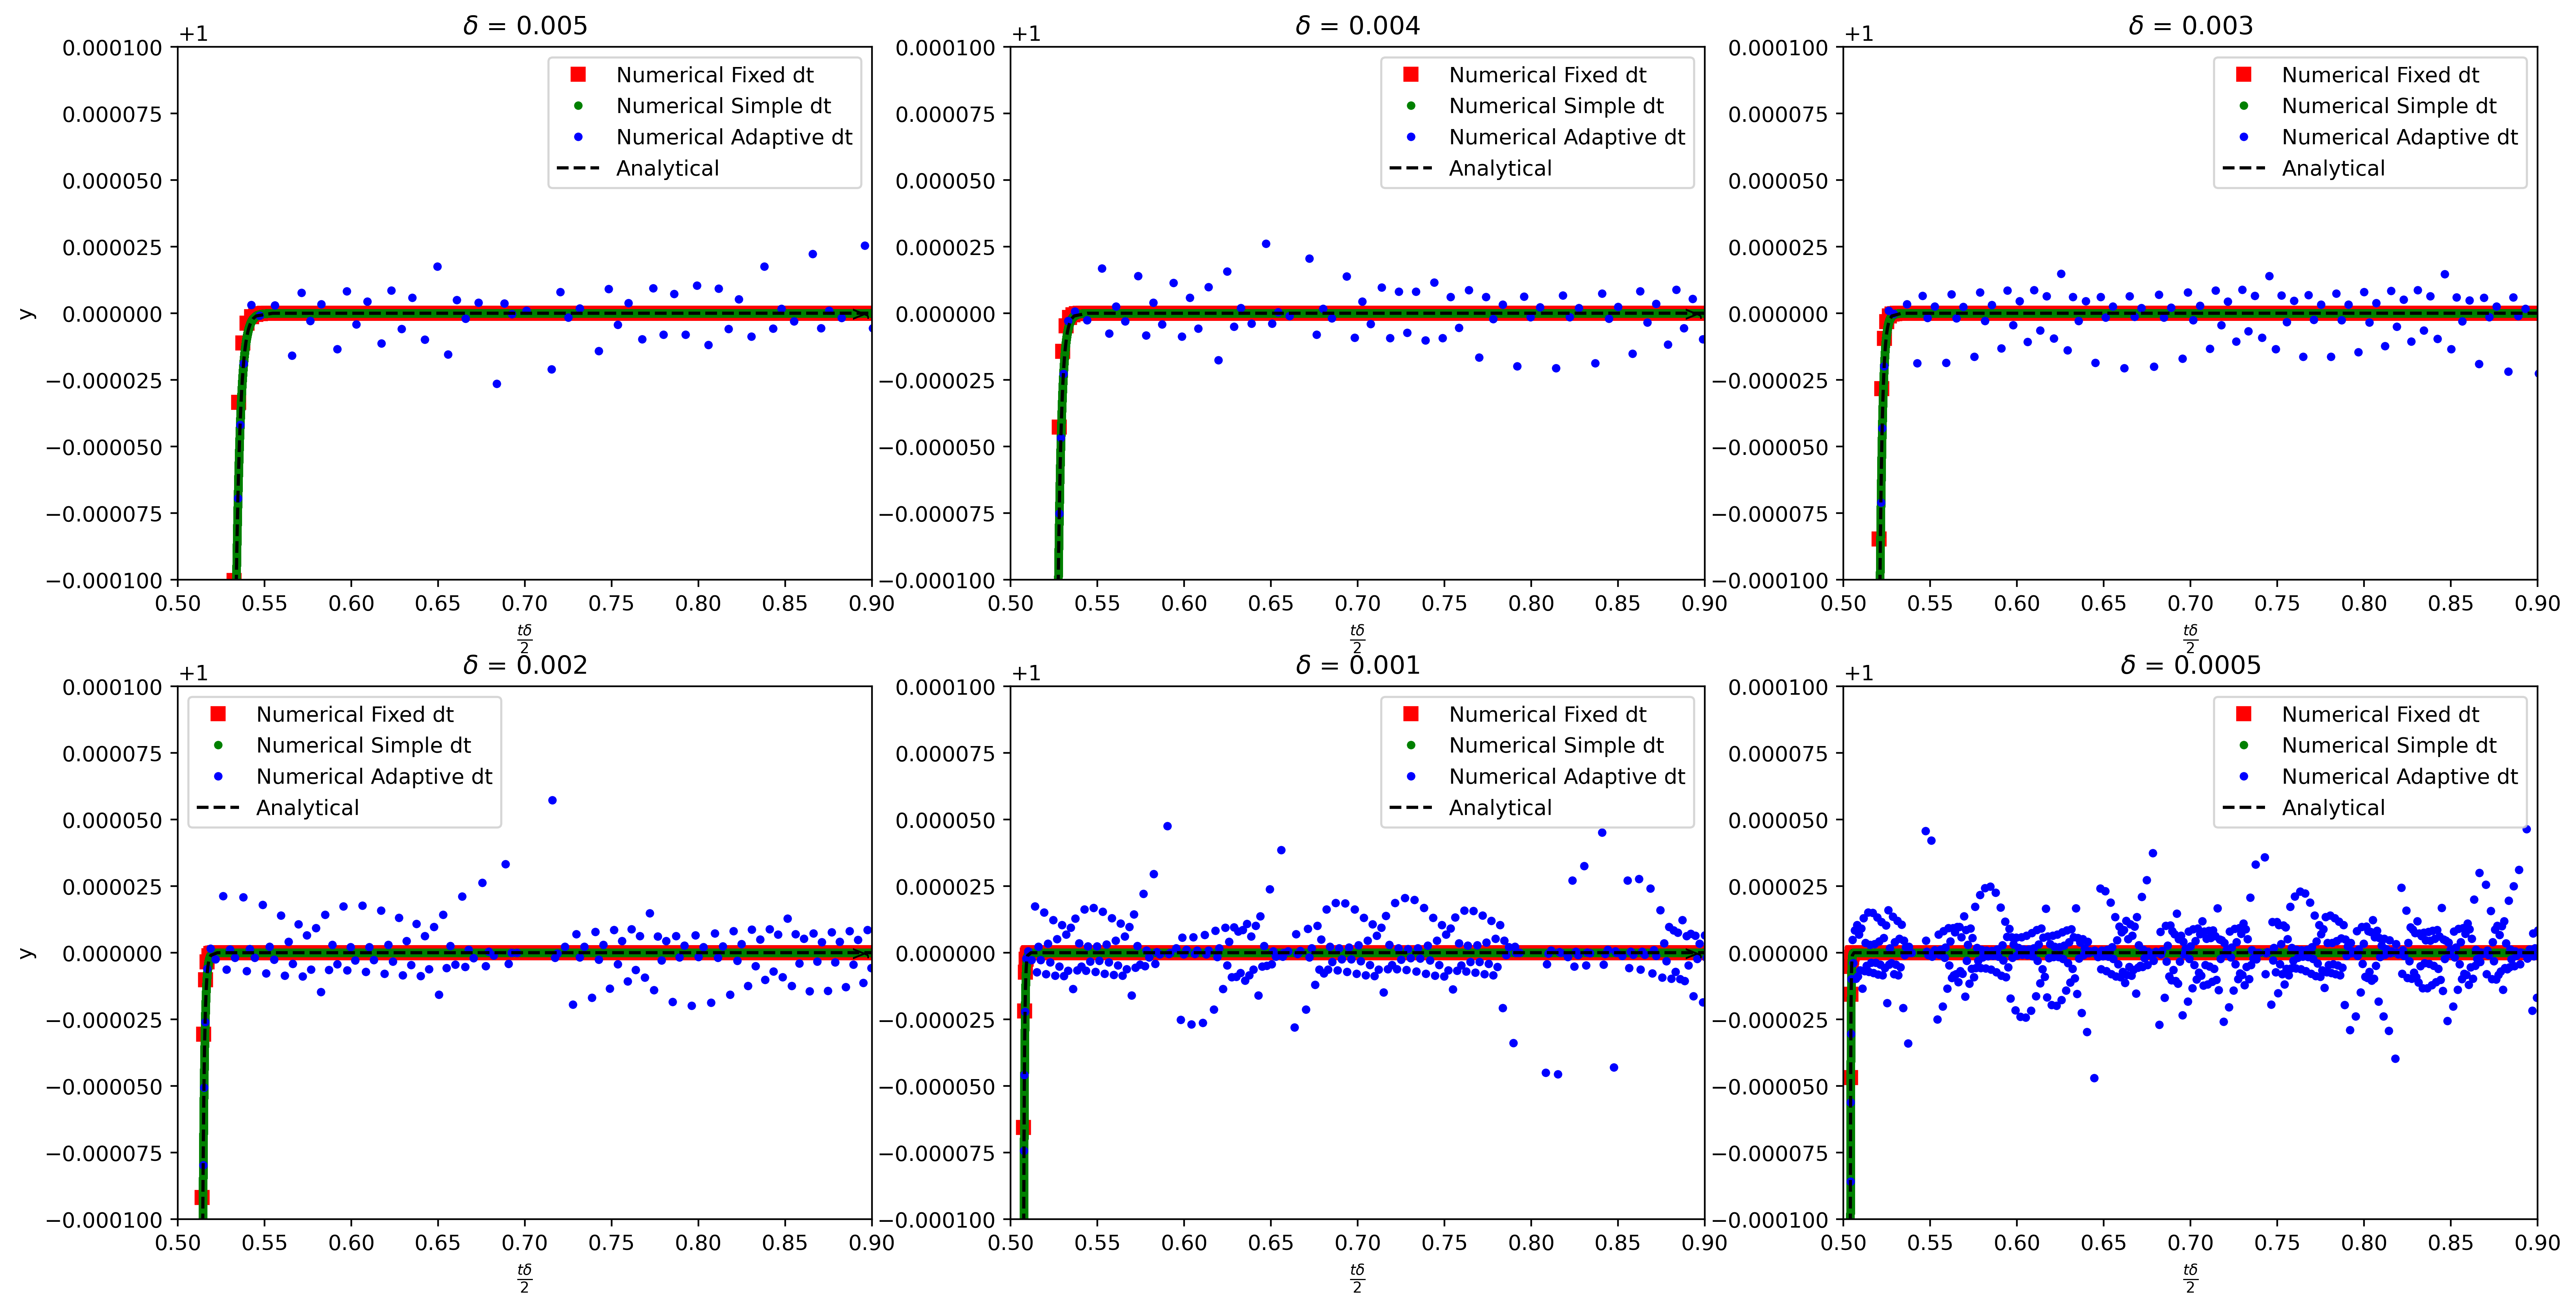

In [ ]:



def Runge_kuta_23(f,u,t,dt0,aeps,reps,alpha,flag):
    #flag =0 constant time step 
    #flag =1 variable time step (simple)
    #flag =2 variable time step (adaptive)
    # f(u,t) is the function to be integrated
    

    Y1=u
    Y2=u+dt0/3*f(Y1,t+dt0/3)
    Y3=u+dt0*2/3*f(Y2,t+dt0/3)
    Y4=u+dt0/4*(f(Y1,t)+3*f(Y3,t+dt0*2/3))
    tol=aeps+reps*abs(Y4)
    
    if flag == 0:
        unew=Y4
        tnew=t+dt0
        dt=dt0
    else:
        y1=u
        y2=u+dt0*f(y1,t+dt0)
        y3=u+dt0/2*(f(y1,t)+3*f(y2,t+dt0))
        error_estimat=abs(Y4-y3)
        if flag ==1:
            if error_estimat>=tol:
                dt=alpha*tol/(error_estimat)*dt0
                unew=u
                tnew=t
                if dt>=dt0:
                    print('no change in dt or it gets bigger')
                    print('dt',dt)
            else:
                unew=Y4
                tnew=t+dt0
                dt=dt0
        elif flag ==2:
            dt=alpha*dt0*(tol/(error_estimat))**(1/3)
            if error_estimat>=tol:
                unew=u
                tnew=t
            else:
                unew=Y4
                tnew=t+dt0
            
    return unew,tnew,dt        


def falme_sys(y,t):
    dy=y**2-y**3
    return dy







def solve_flame_sys(y0,t0,tf,dt0,aeps=1e-6,reps=1e-4,alpha=0.8,flag=0):
    # f(u,t) is the function to be integrated
    # u0 is the initial condition
    # t0 is the initial time
    # tf is the final time
    # n is the number of steps
    dt=dt0
    # Ensures u0 is at least 1D
    
    if flag==0:
        y0 = np.atleast_1d(y0)
        n=int((tf-t0)/dt0)
        t=t0+dt*np.arange(0,n+1,1)
        y=np.zeros([len(t),len(y0)])
        y[0]=y0[0]
        for i in range(1,len(t)):
            y[i],t[i],dt=Runge_kuta_23(falme_sys,y[i-1],t[i-1],dt,aeps,reps,alpha,flag)
    else:
        t,y=[],[]
        y.append(y0)
        t.append(t0)
        tnew=t0
        i=0
        while tnew<tf:
            i+=1
            
            ynew,tnew,dt=Runge_kuta_23(falme_sys,y[i-1],t[i-1],dt,aeps,reps,alpha,flag)
            if float(tnew) > t[i-1]:  # step accepted
                y.append(float(ynew))
                t.append(float(tnew))
            else:  # step rejected, retry with smaller dt
                i-= 1
                pass 
        y=np.array(y)
        t=np.array(t)    

    return t,y


def analytical_flame_plot(delta):
    tend=2/delta
    yvec1=np.linspace(delta,0.999,10000)
    yvec2=np.logspace(-0.0004345117740176917,-1e-8,1000)
    yvec3=np.concatenate((yvec1,yvec2))
    tvec1=Analytic_flame_probagation(yvec3,delta)    
    tve2=np.array([tend])
    tvec=np.concatenate((tvec1,tve2))
    yvec4=np.array([1])
    yvec=np.concatenate((yvec3,yvec4))
    return tvec/tend,yvec

deltavec=np.array([0.005,0.004,0.003,0.002,0.001,0.0005])
axs=plt.subplots(2,3,figsize=(20,10),dpi=400)
axxs=axs[1].flatten()
dt0=1
r_eps=1e-5
a_eps=1e-4
alpha0=0.8
for dd in range(0,len(deltavec)):
    delta=deltavec[dd]
    y0=delta
    t0=0
    tend=2/delta
    tf=0.9*tend
    tvec_an,yvec_an=analytical_flame_plot(delta)
    tvec1,yvec1=solve_flame_sys(delta,0,tf,dt0,aeps=a_eps,reps=r_eps,alpha=alpha0,flag=0)
    tvec2,yvec2=solve_flame_sys(delta,0,tf,dt0,aeps=a_eps,reps=r_eps,alpha=alpha0,flag=1)
    tvec3,yvec3=solve_flame_sys(delta,0,tf,dt0,aeps=a_eps,reps=r_eps,alpha=alpha0,flag=2)
   
    axxs[dd].plot(tvec1/tend,yvec1[:],'rs',label='Numerical Fixed dt') 
    axxs[dd].plot(tvec2/tend,yvec2[:],'g.',label='Numerical Simple dt')
    axxs[dd].plot(tvec3/tend,yvec3[:],'b.',label='Numerical Adaptive dt')
    axxs[dd].plot(tvec_an,yvec_an[:],'k--',label='Analytical')
    axxs[dd].set_title('$\\delta$ = '+str(delta))
    axxs[dd].legend()
    axxs[dd].set_ylim(0.9999,1.0001)
    axxs[dd].set_xlim(0.5,0.9)
    axxs[dd].set_xlabel('$\\frac{t \\delta}{2}$')
    axxs[dd].set_ylabel('y')


